# **i. Perkenalan**

---
`Nama` : Nicholas Halasan

`Batch` : 008-HCK

`Dataset` : house-price-predicition

`Tujuan` : Tujuan utama proyek ini adalah mengembangkan model prediksi harga rumah yang dapat memberikan estimasi yang akurat berdasarkan berbagai fitur dan faktor yang memengaruhi harga properti.

`Project`: MILESTONE 2

---
Latar Belakang :

Dalam beberapa tahun terakhir, pasar properti telah menjadi salah satu sektor ekonomi yang paling dinamis. Permintaan akan rumah terus meningkat, sementara faktor-faktor seperti lokasi, fasilitas, dan kondisi pasar dapat mempengaruhi harga properti secara signifikan. Oleh karena itu, kemampuan untuk secara akurat memprediksi harga rumah menjadi krusial bagi pembeli, penjual, dan pemegang kepentingan lainnya di pasar properti.

Dengan kemajuan teknologi dan ketersediaan data yang melimpah, machine learning menjadi solusi yang efektif untuk menghadapi tantangan tersebut. Pembuatan model prediksi harga rumah menggunakan machine learning dapat memberikan wawasan yang lebih mendalam tentang faktor-faktor apa yang paling berpengaruh pada harga properti.

---
Problem Statement : 

Perusahaan real estate XYZ memiliki sejumlah properti di pasar yang berkembang pesat. Dalam upaya untuk meningkatkan efisiensi penjualan dan memberikan pengalaman yang lebih baik kepada pelanggan, perusahaan ingin mengembangkan model prediksi harga rumah. Model ini diharapkan dapat membantu agen real estate dan pembeli untuk mendapatkan perkiraan harga yang akurat dan realistis.

# **ii. Import Libraries**

>Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kendalltau
import pickle
import plotly.express  as px 


# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from feature_engine.outliers import Winsorizer , OutlierTrimmer
from imblearn.over_sampling import SMOTENC
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,OneHotEncoder


# model 
# model 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import  AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error

from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# **iii. Data Loading**

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
#import file csv 'houseprice'
data = pd.read_csv('houseprice.csv')
data.head(10) #tunjukan 10 data pertama

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [3]:
#menampilkan 10 data terakhir
data.tail(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4590,2014-07-08 00:00:00,380680.555556,4.0,2.50,2620,8331,2.0,0,0,3,2620,0,1991,0,13602 SE 186th Pl,Renton,WA 98058,USA
4591,2014-07-08 00:00:00,396166.666667,3.0,1.75,1880,5752,1.0,0,0,4,940,940,1945,0,3529 SW Webster St,Seattle,WA 98126,USA
4592,2014-07-08 00:00:00,252980.000000,4.0,2.50,2530,8169,2.0,0,0,3,2530,0,1993,0,37654 18th Pl S,Federal Way,WA 98003,USA
4593,2014-07-08 00:00:00,289373.307692,3.0,2.50,2538,4600,2.0,0,0,3,2538,0,2013,1923,5703 Charlotte Ave SE,Auburn,WA 98092,USA
4594,2014-07-09 00:00:00,210614.285714,3.0,2.50,1610,7223,2.0,0,0,3,1610,0,1994,0,26306 127th Ave SE,Kent,WA 98030,USA
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [4]:
# Duplicate Data
dataduplicate = data.copy()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

`INSIGHT:`
- Pada tabel tersebut , terdapat total 18 Kolom , dengan 4 Kolom bertipe data float ,9 kolom bertipe integer dan 5 data bertipe object.
- Jumlah entry data sebanyak 4600 entries
- Dari info missing value, tidak terdapat missing value , karena setiap kolom memiliki 4600 non-null yang jumlahnya sama dengan jumlah entry data
- memory usage sebesar 647 KB

In [6]:
# Melihat deskripsi data
dataduplicate.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


`INSIGHT:`
- Penjualan Rumah di Pada data ini rata ratanya 551962.99 USD , menunjukan rata-rata harga rumah di Amerika Serikat sangatlah tinggi.
- Ada harga rumah yang 0, terlihat dari kolom min pada 'price' , hal ini akan menimbulkan pertanyaan , maka akan kita cek lebih lanjut pada kolom price
- Rata - rata condition terletak pada range 3-4(Dari skala 5) yang menunjukan kualitas rumah yang dijual sebagian besar baik.
- Rumah yang dijual pada data ini range tahun pembuatannya dari 1970 - 2014.
- Rumah tertinggi yang dijual adalah rumah 4 lantai.

Karena tidak ada penjelasan bagaimana harga rumah bisa = 0 , maka untuk row data dengan harga rumah = 0  akan dihapus

In [7]:
#menghapus baris data dengan harga rumah = 0
dataduplicate = dataduplicate.drop(dataduplicate[dataduplicate['price'] == 0].index)
dataduplicate['price'].value_counts()

300000.0     42
400000.0     31
600000.0     29
440000.0     29
450000.0     29
             ..
325900.0      1
684680.0      1
609900.0      1
1635000.0     1
220600.0      1
Name: price, Length: 1740, dtype: int64

In [8]:
#menambahkan kolom bernama 'house_age' untuk menggambarkan berapa usia rumah tersebut
usia_rumah = 2014 - dataduplicate['yr_built']
dataduplicate['house_age'] = usia_rumah

#drop kolom 'yr_built' karena sudah diwakilkan dengan kolom baru 'house_age'
dataduplicate.drop(['yr_built'], axis = 1,inplace=True)

#menghapus kolom street karena semua nilainya unik dan tidak berpengaruh pada harga rumah
dataduplicate.drop(['street'],axis=1,inplace=True)

#menghapus kolom date karena tidak ada hubungannya dengan harga rumah
dataduplicate.drop(['date'],axis=1,inplace=True)


#menghapus kolom country , karena hanya ada 1 unique value yaitu USA.
dataduplicate.drop(['country'],axis=1,inplace=True)


In [9]:
#menambah kolom renovated , untuk menunjukan apakah rumah pernah direnovasi atau tidak
renovated1 = []
for i in dataduplicate['yr_renovated']:
    if i == 0:
        renovated1.append(0)
    else:
        renovated1.append(1)

dataduplicate['renovated'] = renovated1


In [10]:
#hapus kolom yr_renovated , karena sudah diwakilkan dengan kolom renovated yang baru dibuat
dataduplicate.drop(['yr_renovated'],axis=1,inplace=True)

In [11]:
dataduplicate

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,statezip,house_age,renovated
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,WA 98133,59,1
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,Seattle,WA 98119,93,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,WA 98042,48,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,WA 98008,51,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,WA 98052,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,Seattle,WA 98133,60,1
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,Bellevue,WA 98007,31,1
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,Renton,WA 98059,5,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,Seattle,WA 98178,40,0


kolom 'bathrooms' adalah kolom jumlah kamar mandi , namun beberapa ada yang memiliki value desimal. Saya akan membulatkan valuenya agar menjadi bilangan bulat karena menggambarkan jumlah kamar mandi yang sifatnya satuan.

In [12]:
dataduplicate['bathrooms'] = dataduplicate['bathrooms'].round(0)
dataduplicate['floors'] = dataduplicate['floors'].round(0)
dataduplicate['bathrooms'].value_counts()

2.0    2937
1.0     756
3.0     569
4.0     262
5.0      16
6.0       7
0.0       2
8.0       1
7.0       1
Name: bathrooms, dtype: int64

In [13]:
#cek apakah ada data duplikat
dataduplicate.duplicated().sum()

0

Tidak ada kolom yang duplicate

# **iv. Exploratory Data Analysis (EDA)**

> Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

***PENJELASAN KOLOM***

- 'date': menunjukkan tanggal transaksi atau tanggal data dikumpulkan.

- 'price': Menunjukkan harga properti atau rumah.

- 'bedrooms': Menunjukkan jumlah kamar tidur dalam properti.

- 'bathrooms': Menunjukkan jumlah kamar mandi dalam properti.

- 'sqft_living': Menunjukkan luas area dalam satuan kaki persegi dari bagian dalam properti.

- 'sqft_lot': Menunjukkan luas total lahan dalam satuan faki persegi.

- 'floors': Menunjukkan jumlah lantai atau tingkat dalam properti.

- 'waterfront': menunjukkan apakah properti tersebut memiliki lokasi waterfront (tepi pantai) atau tidak.

- 'view': menunjukkan tingkat pemandangan atau tampilan properti.(Skala 1-5 , 1 buruk , 5 pemandangannya sangat indah)

- 'condition': Menunjukkan kondisi umum properti. (Skala 1-5 , 1 Kondisi rumah sangat buruk , 5 Kondisi rumah sangat baik)

- 'sqft_above': Menunjukkan luas area dalam satuan kaki persegi dari bagian atas properti (tanpa lantai bawah).

- 'sqft_basement': Menunjukkan luas area dalam satuan kaki persegi dari lantai bawah atau ruang bawah tanah.

- 'yr_built': Menunjukkan tahun pembangunan properti.

- 'yr_renovated': Menunjukkan tahun renovasi terakhir properti.

- 'street' : Alamat dari properti yang dijual 

- 'city' : Kota letak properti 

- 'statezip' : Kode post properti

- 'country': Letak negara properti


#### 1. Bagaimana Distribusi harga pada data penjualan ini?

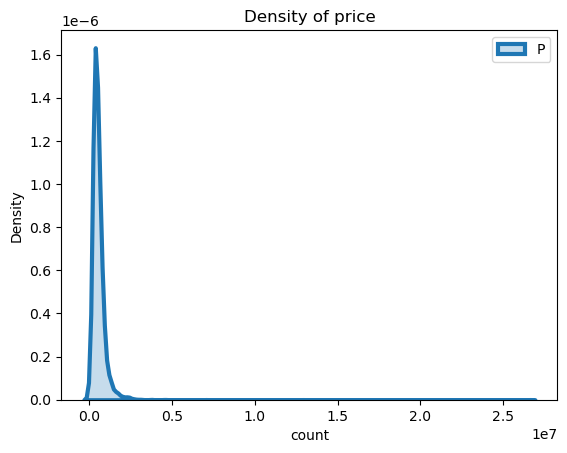

In [14]:
import warnings
  

warnings.filterwarnings('ignore')
sns.distplot(data['price'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
plt.xlabel("count")
plt.ylabel("Density")
plt.title("Density of price")
plt.legend("Price")
plt.show()

`INSIGHT :`
- Terlihat harga penjualan rumah di Washington bersifat skewed

#### 2. Bagaimana persebaran penjualan berdasarkan Kondisi rumah?

In [15]:
df3 = dataduplicate['condition'].value_counts().reset_index()
df3.columns = ['Condition', 'Value']
fig3 = px.pie(df3, values='Value', names='Condition', color_discrete_sequence=px.colors.sequential.Plasma,
              title='Persebaran penjualan berdasarkan kondisi rumah')
fig3.show()

`INSIGHT:`
- Dapat dilihat pada kondisi rumah Cukup baik(3) memiliki penjualan terbesar sebesar 62.6%. Hal ini menunjukan bahwa kondisi rumah 3 sudah cukup baik untuk dibeli dan keuntungannya harga rumahnya lebih murah dibandingkan kondisi baik(4), dan sangat baik(5).
- Kondisi rumah sangat buruk(1) sangat jarang dibeli , karena walaupun harganya murah , tetapi akan menghabiskan lebih banyak uang untuk memperbaiki kerusakan yang ada

#### 3. Apakah rumah yang memiliki view ke pantai memiliki rata-rata harga lebih tinggi?

<Axes: xlabel='waterfront', ylabel='price'>

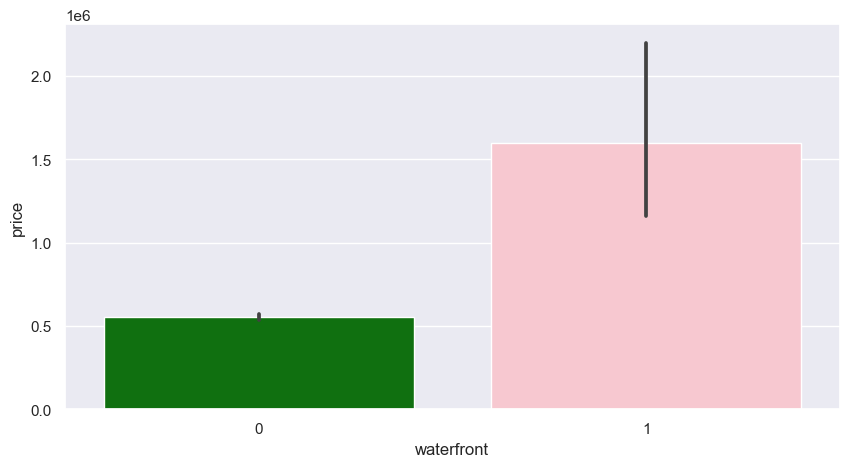

In [16]:
sns.set(rc={'figure.figsize':(10,5)})
cols = ['green','pink']
sns.barplot(x='waterfront', y='price', palette= cols, data=dataduplicate)

In [17]:
#menampilkan angka rata-ratanya
dataduplicate.groupby('waterfront')['price'].mean()

waterfront
0    5.510122e+05
1    1.596783e+06
Name: price, dtype: float64

0 = 551012.2

1 = 1596783

`INSIGHT :`
- Rumah dengan view pantai biasanya harganya jauh lebih tinggi dibanding yang tidak memiliki view pantai
- Sebagai yang kita tahu rumah di pinggir pantai merupakan rumah yang bisa dibilang idaman bagi sebagian besar orang , selain dekat dengan tempat wisata , biasanya udaranya juga sejuk dan nyaman untuk bersantai.
- Rumah dipinggir pantai juga biasanya jauh dari kepadatan pusat kota, karena letaknya yang berada di pinggiran kota.

#### 4. Kota mana yang menjual rumah dengan nilai kondisi rumah yang tinggi?

In [18]:
# Menampilkan nilai mean kondisi rumah setiap kota
city_price= dataduplicate.groupby('city')['price'].mean()

kondisi_df = pd.DataFrame(city_price)
City_mean_price =kondisi_df.sort_values('price',ascending=False)
top3city = City_mean_price.head(3)
top3city



,price
city,
Medina,2.046559e+06
Clyde Hill,1.615711e+06
Yarrow Point,1.194838e+06


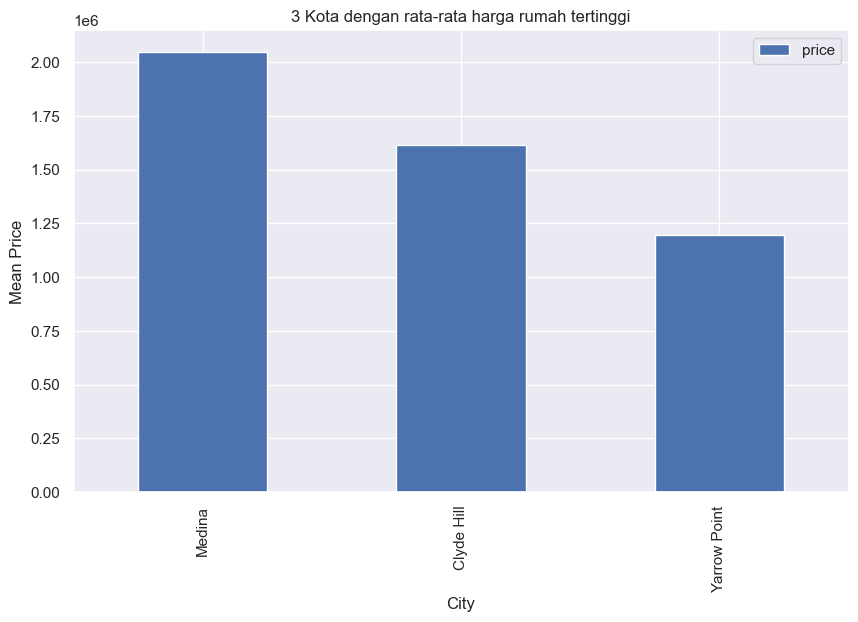

In [19]:
top3city.plot(kind='bar', figsize=(10,6))

plt.title('3 Kota dengan rata-rata harga rumah tertinggi')
plt.ylabel('Mean Price')
plt.xlabel('City')
# plt.xticks(rotation=0) 

plt.show()

`INSIHGT`:
- Daerah Medina, Clyde Hill, dan Yarrow Point merupakan daerah yang bisa dibilang jarang untuk mendirikan rumah (tidak terlalu padat), karena harga tanah dan harga rumah di daerah tersebut cukup mahal
- Bisa dibilang di daerah tersebut merupakan rumah-rumah mewah dan bagus.
- Jika ingin mencari rumah dengan spesifikasi seperti itu dan memiliki uang yang cukup bisa membeli rumah di 3 daerah tersebut.

#### 5. Apakah rumah yang pernah di renovasi memiliki tingkat kondisi yang lebih baik?

<Axes: xlabel='renovated', ylabel='condition'>

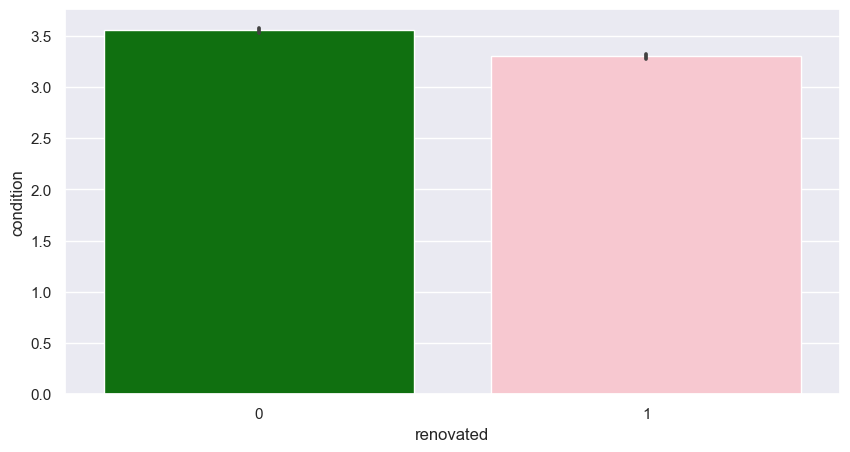

In [20]:
sns.set(rc={'figure.figsize':(10,5)})
cols = ['green','pink']
sns.barplot(x='renovated', y='condition', palette= cols, data=dataduplicate)

`INSIGHT:`
- Tampaknya ada pengaruh kondisi rumah dengan status renovasinya.
- Rumah yang pernah direnovasi memiliki kondisi yang lebih baik.
- Namun begitu perbedaan kondisinya tidak terlalu jauh dengan yang tidak pernah direnovasi
- Hal ini bergantung dengan pemakaian rumah sebelumnya.

#### 6. Apakah hubungan luas ruang keluarga dengan harga?

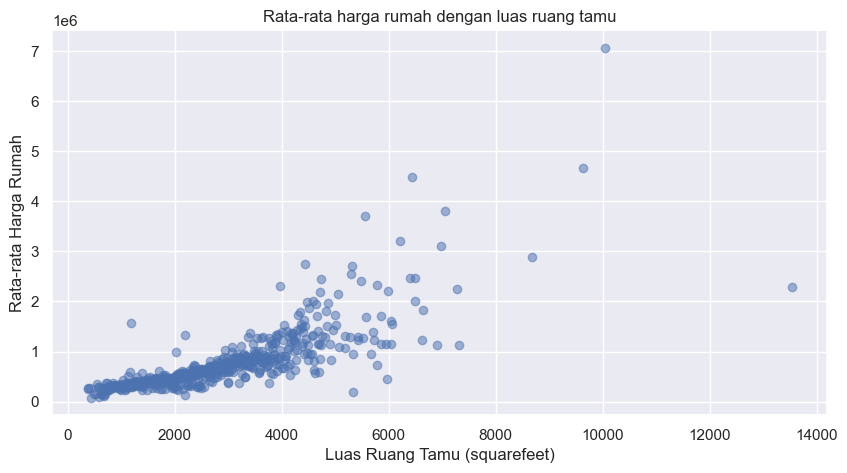

In [21]:

average_purchases = dataduplicate.groupby('sqft_living')['price'].mean()
# Membuat scatter plot
plt.scatter(average_purchases.index, average_purchases.values, alpha=0.5)

# Menambahkan label sumbu dan judul
plt.xlabel('Luas Ruang Tamu (squarefeet)')
plt.ylabel('Rata-rata Harga Rumah')
plt.title('Rata-rata harga rumah dengan luas ruang tamu')

# Menampilkan plot
plt.show()

`INSIGHT`:
- Dari scatter plot diatas dapat dilihat bahwa ada hubungan dengan trend positif antara harga rumah dengan luas ruang tamu
- Artinya semakin besar luas ruang tamu , maka rumahnya juga akan semakin mahal
- Hal ini diakibatkan karena sebagian besar waktu dirumah dihabiskan diruang tamu untuk berkumpul dengan teman atau keluarga, bekera , dan sekedar bersantai
- Ruang tamu yang megah/besar dan juga nyaman akan membuat rumah tersebut memiliki nilai yang lebih tinggi

#### 7. Apakah ada hubungan antara Jumlah tingkat rumah dengan harga rumah?

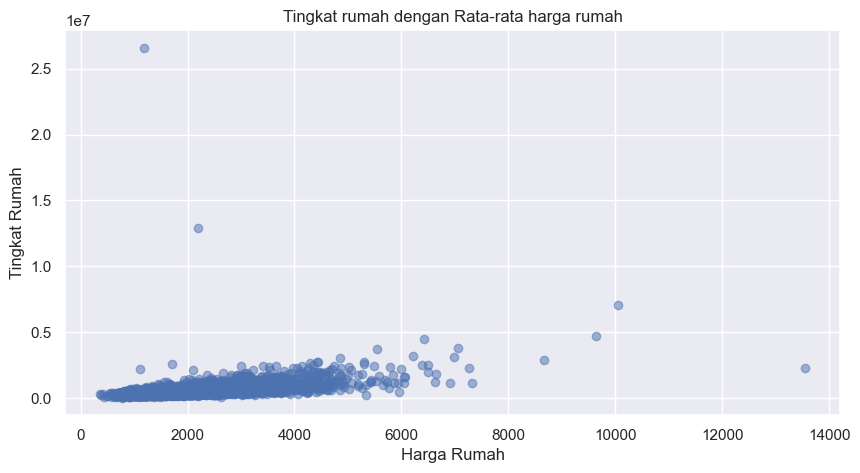

In [22]:

# Membuat scatter plot
plt.scatter('sqft_living', 'price', data=dataduplicate, alpha=0.5)

# Menambahkan label sumbu dan judul
plt.xlabel('Harga Rumah')
plt.ylabel('Tingkat Rumah')
plt.title('Tingkat rumah dengan Rata-rata harga rumah')

# Menampilkan plot
plt.show()

`INSIGHT`:
- Dari scatter plot dilihat sebenarnya ada hubungan tingkat rumah dan harga rumah , namun tidak terlalu signifikan
- Hal ini mungkin diakibatkan jumlah tingkat rumah tidak menggambarkan keindahan dan kenyamanan rumah , ataupun juga kondisi rumah
- Mungkin hal ini berpengaruh pada rumah yang nilai kondisinya sama , maka tingkat rumah akan berpengaruh.
- Terlihat dari ada rumah yang tingkatannya rendah hanya 1 laintai, namun harganya paling mahal , mungkin ini karena rumah tersebut mewah dan sangat luas.
- Sedangkan ada rumah yang tinggi , namun harganya rendah , mungkin ini karena rumah tersebut tinggi namun sempit dan tidak nyaman dihuni.

#### 8. Bagaimana pengaruh usia rumah dengan harga rumah itu sendiri?

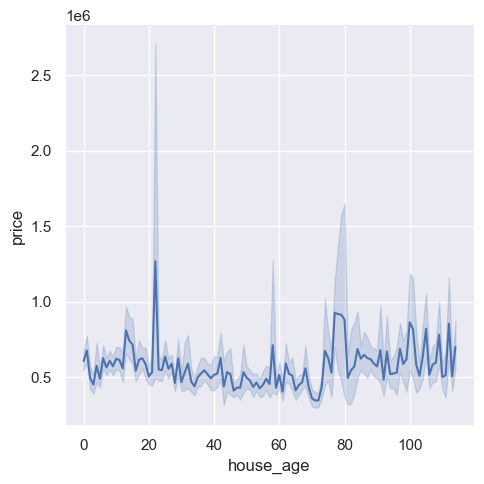

In [23]:
sns.set(rc={'figure.figsize':(10,5)})
sns.relplot(kind='line',
            x='house_age',
            y='price',
            data=dataduplicate
           )

`INSIGHT`:
- Tidak pola yang terlihat signifikan dari grafik diatas
- Usia rumah tidak menjamin harga rumah
- Bisa saja rumah yang sudah tua, namun karena nilai keaslian dan vintage nya menjadi lebih mahal
- Bisa saja rumah yang baru dibangun namun harganya lebih rendah dari rumah yang sudah tua karena kondisinya biasa saja.

# **v. Feature Engineering**

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

### 1. Membagi Data menjadi data Numerikal dan Kategorikal

In [83]:
dataduplicate['view'].value_counts()

0    4103
2     201
3     115
1      69
4      63
Name: view, dtype: int64

- `Data Kategorikal` = Data yang merepresentasikan kategori atau kelompok dan tidak memiliki nilai yang dapat diukur secara numerik.

- `Data Numerikal`  = Data numerikal mengandung nilai yang dapat diukur atau dihitung secara matematis.

In [24]:
#Divide category columns into category_columns
category_columns = dataduplicate[['waterfront','view','condition','renovated','city']]

# Divide numeric columns into numeric_columns
numeric_columns = dataduplicate[['bedrooms', 'bathrooms', 'sqft_living','sqft_lot','floors','sqft_above','sqft_basement','house_age']]

In [25]:
# menampilkan categorical dataframe
category_columns.head()

,waterfront,view,condition,renovated,city
0,0,0,3,1,Shoreline
1,0,4,5,0,Seattle
2,0,0,4,0,Kent
3,0,0,4,0,Bellevue
4,0,0,4,1,Redmond


In [26]:
#menampilkan numerikal dataframe
numeric_columns.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,house_age
0,3.0,2.0,1340,7912,2.0,1340,0,59
1,5.0,2.0,3650,9050,2.0,3370,280,93
2,3.0,2.0,1930,11947,1.0,1930,0,48
3,3.0,2.0,2000,8030,1.0,1000,1000,51
4,4.0,2.0,1940,10500,1.0,1140,800,38


### 2. Cardinality Handling

> Handling Cardinality Hanya dilakukan pada kolom Categorical

In [27]:
# melakukan looping untuk mencari nilai unique tiap kolom
for i in category_columns.columns:
    print(f'cardinality kolom {i}:', category_columns[i].nunique())

cardinality kolom waterfront: 2
cardinality kolom view: 5
cardinality kolom condition: 5
cardinality kolom renovated: 2
cardinality kolom city: 44


`INSIGHT:`
- Kolom waterfront, renovated, view, dan condition termasuk kedalam kolom yang `low cardinality`.

- Kolom City termasuk kedalam `high cardinality` sehingga perlu di handle

##### A. Handling Cardinality Kolom ' city '

In [28]:
#cek unique value kolom city
category_columns['city'].unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

Nama-nama diatas merupakan nama-nama kota yang terletak pada negara bagian Washington , Amerika Serikat . Kita bisa membaginya berdasarkan letak geografisnya terhadap kota pusat / terbesarnya yaitu kota seattle dengan pembagian seperti berikut. 

*Source = Google*

1 =  `Seattle Utara`:
Shoreline,
Lake Forest Park,
Kenmore

2 = `Seattle`:
Seattle

3 = `Wilayah Timur`:
Bellevue,
Redmond,
Kirkland,
Sammamish,
Issaquah,
Woodinville,
Newcastle,

4 = `Wilayah Selatan Seattle`:
Renton,
Kent,
Auburn,
Des Moines,
Federal Way,
Burien,
Tukwila,
SeaTac,
Normandy Park

5 =  `Wilayah Barat Daya Seattle`:
Mercer Island,
Medina,
Clyde Hill,
Yarrow Point,
Beaux Arts Village

6 = `Wilayah Selatan Pegunungan Cascade`:
Black Diamond,
Covington,
Enumclaw

7 = `Wilayah Pegunungan Cascade`:
Maple Valley,
North Bend,
Snoqualmie,
Duvall,
Carnation,
Ravensdale,
Fall City,
Skykomish,
Snoqualmie Pass

8 = `Wilayah Lainnya`:
Bothell,
Inglewood-Finn Hill,
Algona,
Vashon,
Preston,
Milton,
Pacific,

In [29]:
#membuat fungsi untuk mengubah nama kota ke area
def klasifikasi_kota(kota):
    if pd.isna(kota):
        pass
    elif kota in ['Shoreline','Lake Forest Park','Kenmore']:
        return 1
    elif kota in ['Seattle']:
        return 2
    elif kota in ['Bellevue','Redmond','Kirkland','Sammamish','Issaquah','Woodinville','Newcastle']:
        return 3
    elif kota in ['Renton','Kent','Auburn','Des Moines','Federal Way','Burien','Tukwila','SeaTac','Normandy Park']:
        return 4
    elif kota in ['Mercer Island','Medina','Clyde Hill','Yarrow Point','Beaux Arts Village']:
        return 5
    elif kota in ['Black Diamond','Covington','Enumclaw']:
        return 6
    elif kota in ['Maple Valley','North Bend','Snoqualmie','Duvall','Carnation','Ravensdale','Fall City','Skykomish','Snoqualmie Pass']:
        return 7
    elif kota in ['Bothell','Inglewood-Finn Hill','Algona','Vashon','Preston','Milton','Pacific']:
        return 8
    



In [30]:
#buat kolom baru area
category_columns['area'] = category_columns['city'].apply(klasifikasi_kota)
category_columns['area']

0       1
1       2
2       4
3       3
4       3
       ..
4595    2
4596    3
4597    4
4598    2
4599    6
Name: area, Length: 4551, dtype: int64

In [31]:
#melihat kategorikal kolom yang sudah diperbaharui
category_columns['price'] = dataduplicate['price']

In [32]:
#melihat jumlah dari unique value kolom area
category_columns['area'].value_counts()

2    1561
3    1207
4     999
7     300
1     222
5     107
8      78
6      77
Name: area, dtype: int64

In [33]:
#menghapus kolom city karena sudah diwakilkan dengan kolom area dengan lebih baik (tidak high cardinal)
category_columns.drop(['city'],axis=1,inplace=True)

### 3. Feature Selection

Melakukan feature selection menggunakan `Heatmap Correlation`

In [34]:
#membagi kolom kategorikal dan numerikal
cols_num = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','house_age']
cols_cat = ['waterfront','view','condition','city','renovated','area','price']


<Axes: >

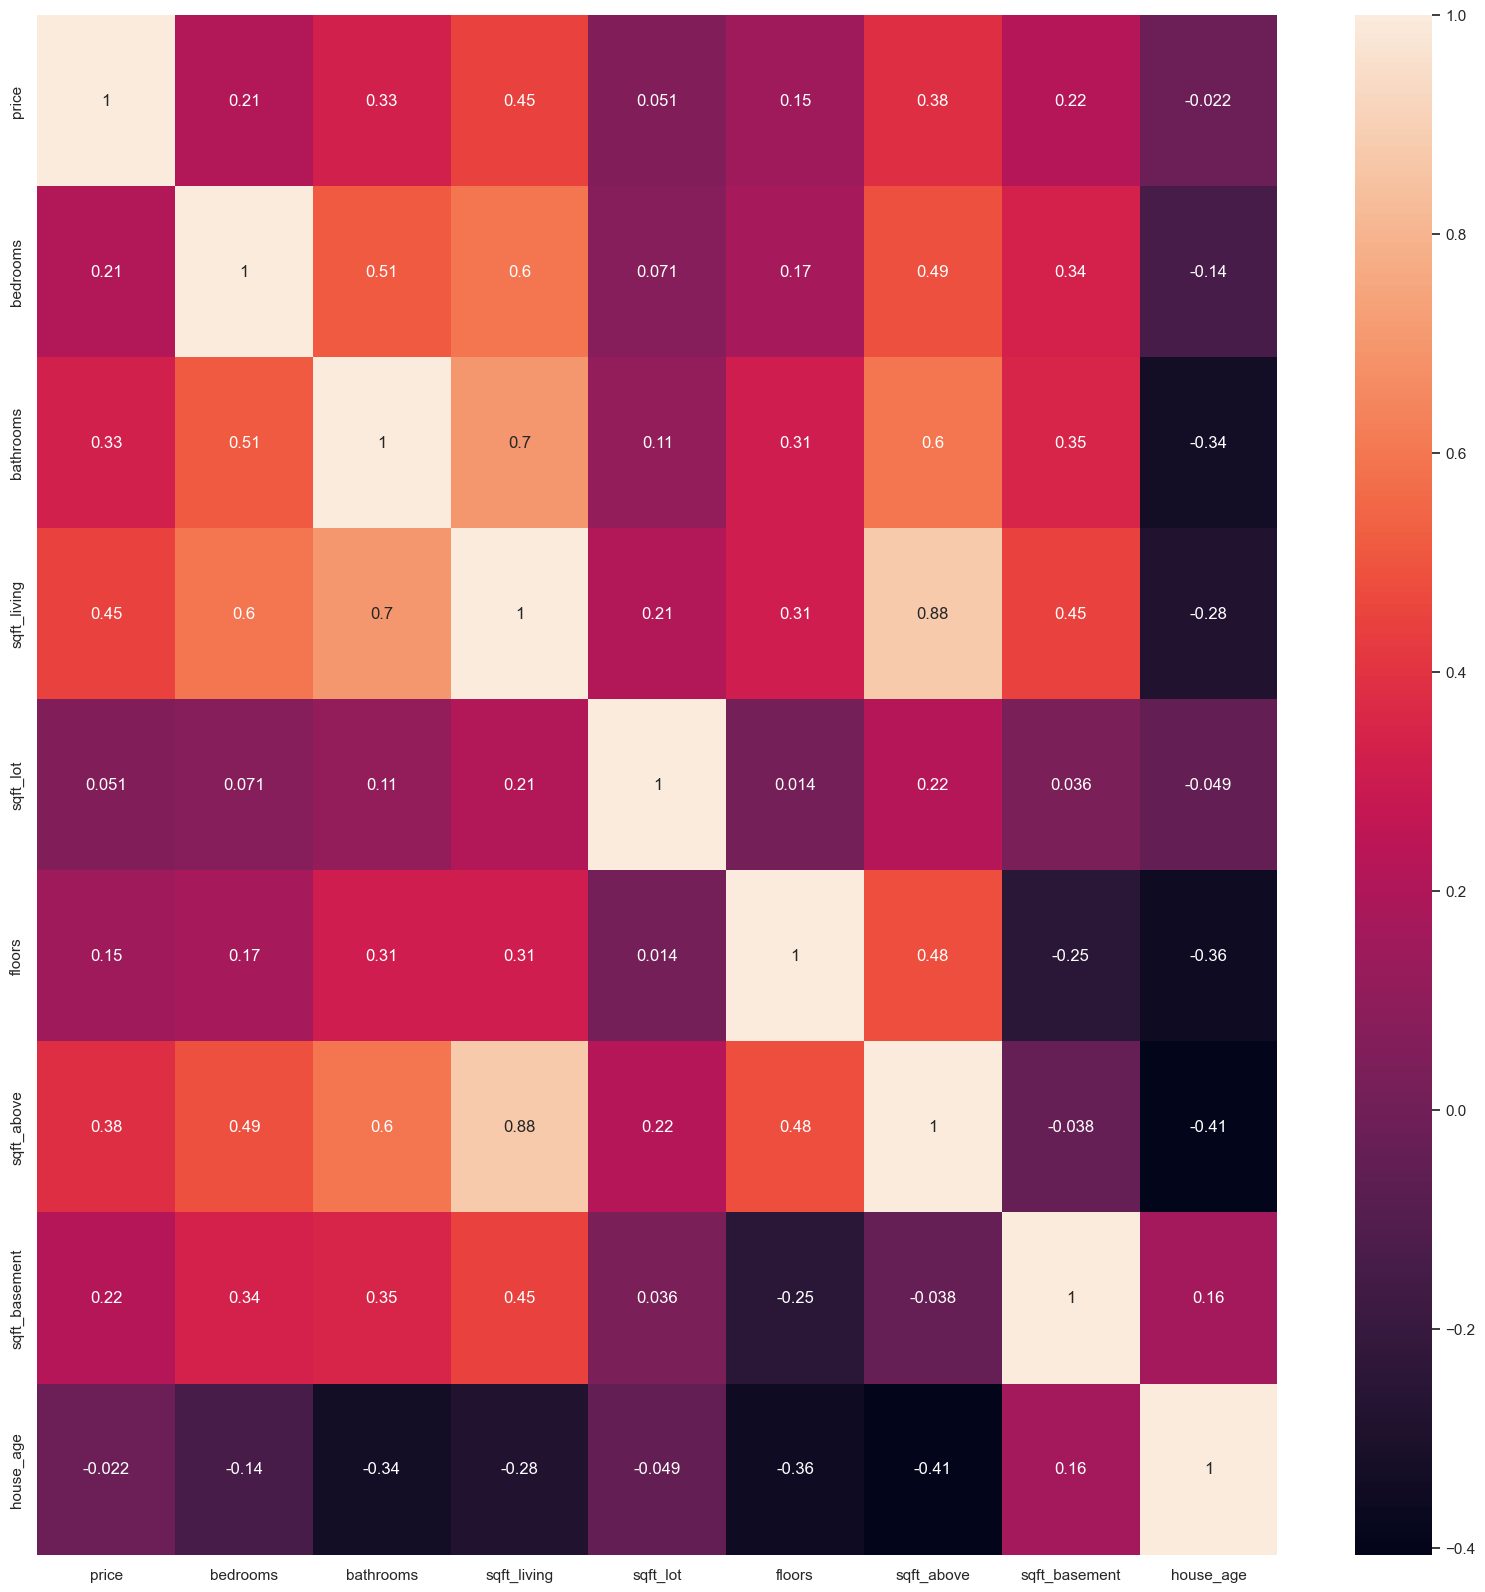

In [35]:
#melakukan plot temp_numeric_cols kedalam heatmap
plt.figure(figsize=(20,20)) #mengatur ukuran figure
sns.heatmap(dataduplicate[cols_num].corr(method='pearson'),annot=True)

Threshold yang saya gunakan adalah 0.1 . Artinya saya akan mengambil kolom dengan korelasi yang < -0.1 dan > 0.1 terhadap kolom price.

`INSIGHT`:

Dari Heatmap correlation dapat dilihat yang korelasinya cukup besar dengan harga rumah adalah :

- bedrooms

- bathrooms

- sqft_living

- floors

- sqft_above

- sqft_basement




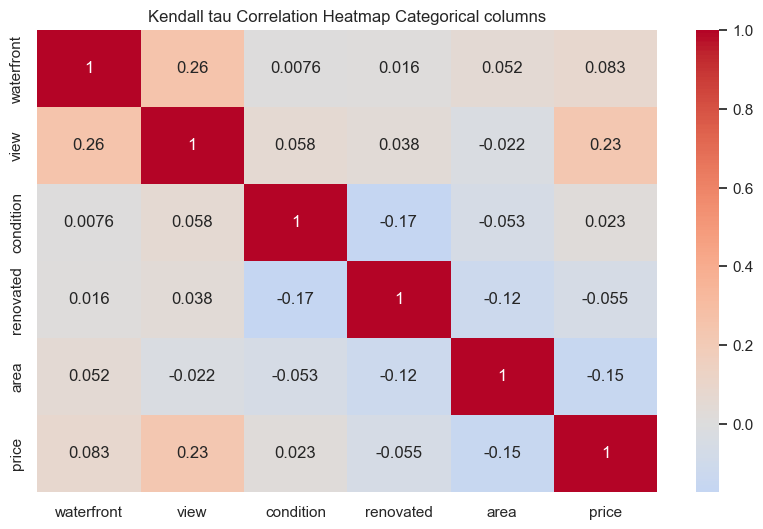

In [36]:
kendall_corr_matrix = category_columns.corr(method=lambda x, y: kendalltau(x, y).correlation)

plt.figure(figsize=(10, 6))
sns.heatmap(kendall_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Kendall tau Correlation Heatmap Categorical columns')
plt.show()

Threshold yang saya gunakan adalah 0.1 . Artinya saya akan mengambil kolom dengan korelasi yang < -0.1 dan > 0.1 terhadap kolom price.

`INSIGHT`:

Dari Heatmap correlation kolom kategorikal dengan target 'price' dipilih beberapa feature dengan korelasi tertinggi :

- area

- view

- condition

**KESIMPULAN FEATURE SELECTION**

Feature yang dipilih untuk dimasukan kedalam model adalah :
1. Area (Kategorikal)
2. View (Kategorikal)
3. Bedrooms (Numerikal)
4. Bathrooms (Numerikal)
5. Sqft_living (Numerikal)
6. Floors (Numerikal)
7. Sqft_above (Numerikal)
8. Sqft_basement (Numerikal)
9. Condition (Kategorikal)

In [37]:
#masukan feature selected kedalam dataframe baru
feature_selected = dataduplicate[['price','view','bedrooms','bathrooms','sqft_living','floors','sqft_above','sqft_basement','condition']]
feature_selected['area'] = category_columns['area']
feature_selected.head()

,price,view,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,condition,area
0,313000.0,0,3.0,2.0,1340,2.0,1340,0,3,1
1,2384000.0,4,5.0,2.0,3650,2.0,3370,280,5,2
2,342000.0,0,3.0,2.0,1930,1.0,1930,0,4,4
3,420000.0,0,3.0,2.0,2000,1.0,1000,1000,4,3
4,550000.0,0,4.0,2.0,1940,1.0,1140,800,4,3


Berhasil membuat dataframe baru bernama feature_selected berisi feature-feature yang sudah dipilih berdasarkan nilai korelasi dengan kolom Price dan juga business knowledge.

### 4. Split Data

In [38]:
#membagi data hasil pemilihan feature kedalam X(feature) dan y(target)
X = feature_selected.drop(['price'], axis=1)
y = feature_selected['price']

In [39]:
# Splitting between Train and Test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20)

print('Train size', X_train.shape)
print('Test size', X_test.shape)
X_train.head()

Train size (3640, 9)
Test size (911, 9)


,view,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,condition,area
799,0,3.0,2.0,1180,1.0,940,240,4,3
3547,0,3.0,2.0,2410,1.0,1860,550,4,4
2982,0,3.0,2.0,1860,2.0,1860,0,3,7
287,0,3.0,2.0,1410,1.0,1410,0,3,4
2634,3,4.0,4.0,3010,2.0,1940,1070,4,2


In [40]:
#membagi lagi data test dan train ke data kategorikal dan data numerikal

#data train numerikal
X_train_num = X_train[['bedrooms','bathrooms','sqft_living','floors','sqft_above','sqft_basement']]

#data test numerikal
X_test_num = X_test[['bedrooms','bathrooms','sqft_living','floors','sqft_above','sqft_basement']]
X_test_num.head()

,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement
3286,4.0,4.0,3770,2.0,2830,940
2352,2.0,2.0,982,2.0,806,176
3395,3.0,2.0,2320,3.0,2320,0
2938,3.0,3.0,3240,2.0,3240,0
648,3.0,1.0,1050,1.0,1050,0


In [41]:
#data train categorical
X_train_cat = X_train[['area','view','condition']]

#data test categorical
X_test_cat = X_test[['area','view','condition']]

X_train_cat.head()

,area,view,condition
799,3,0,4
3547,4,0,4
2982,7,0,3
287,4,0,3
2634,2,3,4


### 5. Cek Skewness data numerikal

Lihat Skewness dari kolom X_train_num

In [42]:
#for loop untuk melihat nilai skew dari semua kolom di X_train_num
for i in X_train_num:
    skew = X_train_num[i].skew()
    print('Skewness of column', i, 'is', skew)

Skewness of column bedrooms is 0.4533580005797982
Skewness of column bathrooms is 1.1908781083649216
Skewness of column sqft_living is 1.878710429288805
Skewness of column floors is 0.31432645360950207
Skewness of column sqft_above is 1.4947947591577937
Skewness of column sqft_basement is 1.733253552015664


Dari nilai skewness tersebut , lihat mana yang terdistribusi normal dan mana yang skewed.

In [43]:
normal = []  # untuk menampung kolom yang masuk dalam skewness normal
skewed = []  # untuk menampung kolom yang masuk dalam skewness skewed

for column in X_train_num.columns:  # untuk mencari kolom mana yang skewed atau normal
    skewness = X_train_num[column].skew()
    if skewness < -0.5 or skewness > 0.5:  # syarat
        skewed.append(column)  # masuk ke variabel penampung skewed
    elif skewness >= -0.5 or skewness <= 0.5:  # syarat
        normal.append(column)  # masuk ke variabel penampung normal

In [44]:
print (f'Kolom yang termasuk distribusi normal adalah {normal}')
print (f'Kolom yang termasuk distribusi skewed adalah {skewed}')

Kolom yang termasuk distribusi normal adalah ['bedrooms', 'floors']
Kolom yang termasuk distribusi skewed adalah ['bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement']


Melihat jumlah outlier pada setiap kolom di X_train_num

In [45]:
threshold = 3

outlier_counts = {}

for col in X_train_num.columns:
    data_skew = X_train_num[col]
    mean = np.mean(data_skew)
    std_dev = np.std(data_skew)

    upper_bound = mean + threshold * std_dev
    lower_bound = mean - threshold * std_dev

    outliers = np.where((data_skew > upper_bound) | (data_skew < lower_bound))
    
    outlier_counts[col] = len(outliers[0])

for col, count in outlier_counts.items():
    print(f"Jumlah outlier dalam kolom {col}: {count} outlier")

Jumlah outlier dalam kolom bedrooms: 13 outlier
Jumlah outlier dalam kolom bathrooms: 20 outlier
Jumlah outlier dalam kolom sqft_living: 40 outlier
Jumlah outlier dalam kolom floors: 1 outlier
Jumlah outlier dalam kolom sqft_above: 45 outlier
Jumlah outlier dalam kolom sqft_basement: 38 outlier


Melihat persentase outlier pada kolom X_train_num

In [46]:
# Set the threshold for identifying outliers
threshold = 3

# Initialize a dictionary to store outlier percentages for each numerical column
outlier_percentages = {}

# Iterate through each column in X_train_num
for col in X_train_num.columns:
    data_skew = X_train_num[col]
    mean = np.mean(data_skew)
    std_dev = np.std(data_skew)

    upper_bound = mean + threshold * std_dev
    lower_bound = mean - threshold * std_dev

    # Identify outliers based on the threshold
    outliers = np.where((data_skew > upper_bound) | (data_skew < lower_bound))
    
    # Calculate the percentage of outliers
    total_data_points = len(data_skew)
    percentage = (len(outliers[0]) / total_data_points) * 100
    
    # Store the percentage of outliers in the dictionary
    outlier_percentages[col] = percentage

# Print the percentage of outliers for each column
for col, percentage in outlier_percentages.items():
    print(f"Percentage of outliers in column {col}: {percentage:.2f}%")

Percentage of outliers in column bedrooms: 0.36%
Percentage of outliers in column bathrooms: 0.55%
Percentage of outliers in column sqft_living: 1.10%
Percentage of outliers in column floors: 0.03%
Percentage of outliers in column sqft_above: 1.24%
Percentage of outliers in column sqft_basement: 1.04%


Sebenarnya semua outlier persentasenya dibawah 5 % , namun karena jumlah data saya hanya sekitar 4000an data, saya takut melakukan trimming akan membuat model saya kekurangan data untuk belajar. Sebagai gantinya saya akan melakukan capping dengan metode Gaussian untuk kolom 'bedroom' dan 'floors' , dan menggunakan metode iqr untuk kolom 'bathrooms', 'sqft_living', 'sqft_above', dan 'sqft_basement'

### 6. Check Missing Value

In [47]:
#check apakah ada missing value di X_train
X_train.isnull().sum()

view             0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
sqft_above       0
sqft_basement    0
condition        0
area             0
dtype: int64

In [48]:
#check apakah ada missing value di X_test
X_test.isnull().sum()


view             0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
sqft_above       0
sqft_basement    0
condition        0
area             0
dtype: int64

Insight :
Tidak terdapat missing value pada kolom X_test, jadi tidak perlu handle missing value

### 7. Membuat Pipeline untuk Preprocessing

> Pipeline preprocessing berguna untuk menyatukan semua proses pada preprocessing menjadi 1. Pipeline memastikan bahwa setiap langkah preprocessing hanya diterapkan pada data pelatihan dan validasi secara terpisah, mengurangi risiko kebocoran data (data leakage).

#### A. Memasukan langkah-langkah yang akan digunakan pada preprocessing menggunakan `pipeline`.

In [49]:
# define kolom numerik yang akan di proses pada numerik features
numeric_features = ['bedrooms','bathrooms','sqft_living','floors','sqft_above','sqft_basement']

# membuat numeric transformer pipeline
numeric_transformer = Pipeline(
    steps=[
        ('winsorizer Gaussian', Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=['bedrooms', 'floors'])),
        ('winsorizer iqr', Winsorizer(capping_method='iqr', tail='both', fold=3, variables=['sqft_living', 'sqft_above', 'sqft_basement'])), 
        ('scaler', StandardScaler())
    ]
)

# Define categorical features
categorical_features = ['view','condition','area']

# ordinal transformer pipeline
categorical_transformer = Pipeline([
        ('passthrough', None)
    ]
)

#### B. Menyatukan semua transformer menjadi column transformer dan dimasukan ke variabel bernama preprocessor

In [50]:
#ColumnTransformer for preprocessing
preprocessor = ColumnTransformer([
        ('Numerical', numeric_transformer, numeric_features),
        ('Categorical', 'passthrough', categorical_features)
    ])

preprocessor

ColumnTransformer(transformers=[('Numerical',
                                 Pipeline(steps=[('winsorizer Gaussian',
                                                  Winsorizer(tail='both',
                                                             variables=['bedrooms',
                                                                        'floors'])),
                                                 ('winsorizer iqr',
                                                  Winsorizer(capping_method='iqr',
                                                             tail='both',
                                                             variables=['sqft_living',
                                                                        'sqft_above',
                                                                        'sqft_basement'])),
                                                 ('scaler', StandardScaler())]),
                                 ['bedrooms', 'bathrooms', 'sqft_living',
                                  'floors', 'sqft_above', 'sqft_basement']),
                                ('Categorical', 'passthrough',
                                 ['view', 'condition', 'area'])])

Berhasil untuk membuat pipeline Column Transformer untuk preprocessing, Prosesnya adalah untuk data numerikal akan dilakukan capping gaussian dan iqr(sesuai dengan jenis distribusi datanya), setelah itu dilakukan scaling menggunakan Standar scaler. Untuk Kolom Kategorikal tidak ada proses encoding karena data nya sudah berbentuk angka.

# **vi. Model Definition**

> Bagian ini berisi cell untuk mendefinisikan model.

Pada tahap kali ini saya akan menggunakan 6 model:
- KNN Regressor
- SVR (Support Vector Reggresor)
- DecisionTree Regressor
- RandomForest Regressor
- AdaBoost Regressor
- Linear Regression

## A. Membuat pipeline untuk masing-masing model


In [51]:
#pipeline untuk linear regression
pipe_linreg = Pipeline([
    ('transormer', preprocessor),
    ('regressor', LinearRegression())
])

#pipeline untuk KNN
pipe_knn = Pipeline([
    ('transormer', preprocessor),
    ('regressor', KNeighborsRegressor())
])

#pipeline untuk decision tree regressor
pipe_dtr = Pipeline([
    ('transormer', preprocessor),
    ('regressor', DecisionTreeRegressor())
])

#pipeline untuk adaboost regressor
pipe_abr = Pipeline([
    ('transormer', preprocessor),
    ('regressor', AdaBoostRegressor())
])

#pipeline untuk random forest regressor
pipe_rfr = Pipeline([
    ('transormer', preprocessor),
    ('regressor', RandomForestRegressor())
])

#pipeline untuk support vectore regressor
pipe_svr = Pipeline([
    ('transormer', preprocessor),
    ('regressor', SVR() )
])

#pipeline untuk SGD Regressor
pipe_sgd = Pipeline([
    ('transormer', preprocessor),
    ('regressor', SGDRegressor() )
])

In [52]:
#melihat pipeline untuk linear regression
pipe_linreg

Pipeline(steps=[('transormer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('winsorizer '
                                                                   'Gaussian',
                                                                   Winsorizer(tail='both',
                                                                              variables=['bedrooms',
                                                                                         'floors'])),
                                                                  ('winsorizer '
                                                                   'iqr',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both',
                                                                              variables=['sqft_living',
                                                                                         'sqft_above',
                                                                                         'sqft_basement'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'floors',
                                                   'sqft_above',
                                                   'sqft_basement']),
                                                 ('Categorical', 'passthrough',
                                                  ['view', 'condition',
                                                   'area'])])),
                ('regressor', LinearRegression())])

In [53]:
#melihat pipline untuk SGD Regressor
pipe_sgd

Pipeline(steps=[('transormer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('winsorizer '
                                                                   'Gaussian',
                                                                   Winsorizer(tail='both',
                                                                              variables=['bedrooms',
                                                                                         'floors'])),
                                                                  ('winsorizer '
                                                                   'iqr',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both',
                                                                              variables=['sqft_living',
                                                                                         'sqft_above',
                                                                                         'sqft_basement'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'floors',
                                                   'sqft_above',
                                                   'sqft_basement']),
                                                 ('Categorical', 'passthrough',
                                                  ['view', 'condition',
                                                   'area'])])),
                ('regressor', SGDRegressor())])

## B. Base Model Evaluation


#### 1. Linear Regression

In [54]:
pipe_linreg.fit(X_train,y_train)

print (pipe_linreg.score(X_train,y_train))
print(pipe_linreg.score(X_test,y_test))

0.21681588740644486
0.4775084313233383


#### 2. KNN 

In [55]:
pipe_knn.fit(X_train,y_train)

print (pipe_knn.score(X_train,y_train))
print(pipe_knn.score(X_test,y_test))

0.28551601535249627
0.3884955966692657


#### 3. Decission Tree

In [56]:
pipe_dtr.fit(X_train,y_train)

print (pipe_dtr.score(X_train,y_train))
print(pipe_dtr.score(X_test,y_test))

0.6515254951629268
0.29223969607496525


#### 4. ADA Boost Regressor

In [57]:
pipe_abr.fit(X_train,y_train)

print (pipe_abr.score(X_train,y_train))
print(pipe_abr.score(X_test,y_test))

0.11799991728456138
-0.13106674145246444


#### 5. Random Forest Regressor

In [58]:
pipe_rfr.fit(X_train,y_train)

print (pipe_rfr.score(X_train,y_train))
print(pipe_rfr.score(X_test,y_test))

0.5947377231509956
0.5297567690717078


#### 6. SVR

In [59]:
pipe_svr.fit(X_train,y_train)

print (pipe_svr.score(X_train,y_train))
print(pipe_svr.score(X_test,y_test))

-0.02589862271972798
-0.08851814726045393


#### 7. SGD Regressor

In [60]:
pipe_sgd.fit(X_train,y_train)

y_train_sgd = pipe_sgd.predict(X_train)
y_test_sgd = pipe_sgd.predict(X_test)

print (pipe_sgd.score(X_train,y_train))
print(pipe_sgd.score(X_test,y_test))


0.20593684803263734
0.4929153169063659


## C. Menggunakan Cross Validation

Fungsi Cross-Validation adalah metode evaluasi kinerja model yang digunakan untuk mengukur seberapa baik model tersebut akan berkinerja pada data yang belum pernah dilihat sebelumnya. Tujuan utamanya adalah untuk mendapatkan estimasi yang lebih stabil dan dapat diandalkan tentang seberapa baik model dapat digeneralisasi ke data baru.

#### 1. Cross Validation Linear Regression

In [61]:
r2_train_cross_val_linreg = cross_val_score(pipe_linreg,
                                        X_train,
                                        y_train,
                                        cv=5,
                                        scoring="r2")

print('----Cross Validation Linear Regression ---- ')
print('r2 Score - All - Cross Validation  : ', r2_train_cross_val_linreg)
print('r2 Score - Mean - Cross Validation : ', r2_train_cross_val_linreg.mean())
print('r2 Score - Std - Cross Validation  : ', r2_train_cross_val_linreg.std())
print('r2 Score - Range of Test-Set       : ', (r2_train_cross_val_linreg.mean()-r2_train_cross_val_linreg.std()) , '-', (r2_train_cross_val_linreg.mean()+r2_train_cross_val_linreg.std()))

----Cross Validation Linear Regression ---- 
r2 Score - All - Cross Validation  :  [0.60003973 0.06098728 0.58421499 0.20870677 0.53656879]
r2 Score - Mean - Cross Validation :  0.3981035121427746
r2 Score - Std - Cross Validation  :  0.22095557689779521
r2 Score - Range of Test-Set       :  0.1771479352449794 - 0.6190590890405698


#### 2. Cross Validation KNN

In [62]:
r2_train_cross_val_knn = cross_val_score(pipe_knn,
                                        X_train,
                                        y_train,
                                        cv=5,
                                        scoring="r2")

print('----Cross Validation KNN ---- ')
print('r2 Score - All - Cross Validation  : ', r2_train_cross_val_knn)
print('r2 Score - Mean - Cross Validation : ', r2_train_cross_val_knn.mean())
print('r2 Score - Std - Cross Validation  : ', r2_train_cross_val_knn.std())
print('r2 Score - Range of Test-Set       : ', (r2_train_cross_val_knn.mean()-r2_train_cross_val_knn.std()) , '-', (r2_train_cross_val_knn.mean()+r2_train_cross_val_knn.std()))

----Cross Validation KNN ---- 
r2 Score - All - Cross Validation  :  [ 0.29816298  0.04568595  0.60961041  0.09036718 -1.17636778]
r2 Score - Mean - Cross Validation :  -0.02650825312093428
r2 Score - Std - Cross Validation  :  0.6084582433363115
r2 Score - Range of Test-Set       :  -0.6349664964572458 - 0.5819499902153772


#### 3. Cross Validation Decission Tree

In [63]:
r2_train_cross_val_dtr = cross_val_score(pipe_dtr,
                                        X_train,
                                        y_train,
                                        cv=5,
                                        scoring="r2")

print('----Cross Validation Decission Tree ---- ')
print('r2 Score - All - Cross Validation  : ', r2_train_cross_val_dtr)
print('r2 Score - Mean - Cross Validation : ', r2_train_cross_val_dtr.mean())
print('r2 Score - Std - Cross Validation  : ', r2_train_cross_val_dtr.std())
print('r2 Score - Range of Test-Set       : ', (r2_train_cross_val_dtr.mean()-r2_train_cross_val_dtr.std()) , '-', (r2_train_cross_val_dtr.mean()+r2_train_cross_val_dtr.std()))

----Cross Validation Decission Tree ---- 
r2 Score - All - Cross Validation  :  [-0.7436948  -0.21900032  0.42315936 -1.28077335 -1.93083185]
r2 Score - Mean - Cross Validation :  -0.7502281958842507
r2 Score - Std - Cross Validation  :  0.8166256477368401
r2 Score - Range of Test-Set       :  -1.5668538436210908 - 0.06639745185258938


#### 4. Cross Validation Ada Boost Regressor

In [64]:
r2_train_cross_val_abr = cross_val_score(pipe_abr,
                                        X_train,
                                        y_train,
                                        cv=5,
                                        scoring="r2")

print('----Cross Validation Ada Boost Regressor ---- ')
print('r2 Score - All - Cross Validation  : ', r2_train_cross_val_abr)
print('r2 Score - Mean - Cross Validation : ', r2_train_cross_val_abr.mean())
print('r2 Score - Std - Cross Validation  : ', r2_train_cross_val_abr.std())
print('r2 Score - Range of Test-Set       : ', (r2_train_cross_val_abr.mean()-r2_train_cross_val_abr.std()) , '-', (r2_train_cross_val_abr.mean()+r2_train_cross_val_abr.std()))

----Cross Validation Ada Boost Regressor ---- 
r2 Score - All - Cross Validation  :  [-0.02472458  0.03066703 -0.29076338 -1.17047093 -1.53342215]
r2 Score - Mean - Cross Validation :  -0.5977428023424154
r2 Score - Std - Cross Validation  :  0.6357670205397399
r2 Score - Range of Test-Set       :  -1.2335098228821553 - 0.03802421819732449


#### 5. Cross Validation Random Forest Regressor

In [65]:
r2_train_cross_val_rfr = cross_val_score(pipe_rfr,
                                        X_train,
                                        y_train,
                                        cv=5,
                                        scoring="r2")

print('----Cross Validation Random Forest Regressor ---- ')
print('r2 Score - All - Cross Validation  : ', r2_train_cross_val_rfr)
print('r2 Score - Mean - Cross Validation : ', r2_train_cross_val_rfr.mean())
print('r2 Score - Std - Cross Validation  : ', r2_train_cross_val_rfr.std())
print('r2 Score - Range of Test-Set       : ', (r2_train_cross_val_rfr.mean()-r2_train_cross_val_rfr.std()) , '-', (r2_train_cross_val_rfr.mean()+r2_train_cross_val_rfr.std()))

----Cross Validation Random Forest Regressor ---- 
r2 Score - All - Cross Validation  :  [ 0.54069964  0.03868661  0.33462424 -0.5818594  -1.20730995]
r2 Score - Mean - Cross Validation :  -0.17503177439773315
r2 Score - Std - Cross Validation  :  0.6401254877804915
r2 Score - Range of Test-Set       :  -0.8151572621782246 - 0.46509371338275834


#### 6. Cross Validation SVR

In [66]:
r2_train_cross_val_svr = cross_val_score(pipe_svr,
                                        X_train,
                                        y_train,
                                        cv=5,
                                        scoring="r2")

print('----Cross Validation SVR ---- ')
print('r2 Score - All - Cross Validation  : ', r2_train_cross_val_svr)
print('r2 Score - Mean - Cross Validation : ', r2_train_cross_val_svr.mean())
print('r2 Score - Std - Cross Validation  : ', r2_train_cross_val_svr.std())
print('r2 Score - Range of Test-Set       : ', (r2_train_cross_val_svr.mean()-r2_train_cross_val_svr.std()) , '-', (r2_train_cross_val_svr.mean()+r2_train_cross_val_svr.std()))

----Cross Validation SVR ---- 
r2 Score - All - Cross Validation  :  [-0.07725362 -0.0103152  -0.06731918 -0.02491511 -0.05568261]
r2 Score - Mean - Cross Validation :  -0.04709714190268275
r2 Score - Std - Cross Validation  :  0.025444088713257967
r2 Score - Range of Test-Set       :  -0.07254123061594071 - -0.021653053189424783


#### 7. Cross Validation SGD Regressor

In [67]:
r2_train_cross_val_sgd = cross_val_score(pipe_sgd,
                                        X_train,
                                        y_train,
                                        cv=5,
                                        scoring="r2")

print('----Cross Validation SGD Regressor ---- ')
print('r2 Score - All - Cross Validation  : ', r2_train_cross_val_sgd)
print('r2 Score - Mean - Cross Validation : ', r2_train_cross_val_sgd.mean())
print('r2 Score - Std - Cross Validation  : ', r2_train_cross_val_sgd.std())
print('r2 Score - Range of Test-Set       : ', (r2_train_cross_val_sgd.mean()-r2_train_cross_val_sgd.std()) , '-', (r2_train_cross_val_sgd.mean()+r2_train_cross_val_sgd.std()))

----Cross Validation SGD Regressor ---- 
r2 Score - All - Cross Validation  :  [0.4977323  0.0542289  0.63908822 0.19599817 0.56259808]
r2 Score - Mean - Cross Validation :  0.38992913313856914
r2 Score - Std - Cross Validation  :  0.22530876805287336
r2 Score - Range of Test-Set       :  0.16462036508569577 - 0.6152379011914425


Setelah dilihat dari r2 Score dan standar deviasinya, saya memutuskan model paling baik yang tersedia untuk digunakan dalam model adalah Menggunakan SGD Regressor.
SGD Regressor memiliki rata-rata r2 score sebesar 38% dari 5 jenis pembagian data. 

SGD Regressor merupakan salah satu algoritma dalam machine learning yang digunakan untuk melakukan regresi. Ini adalah varian dari algoritma Gradient Descent yang digunakan untuk meminimalkan fungsi biaya (cost function) dan menemukan parameter terbaik untuk model regresi.

# **vii. Model Training**

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

### 1. Hyperparameter Tunning

Hyperparameter tuning adalah proses mencari dan memilih kombinasi terbaik dari hyperparameter untuk model machine learning guna meningkatkan kinerja model pada data uji.

Menggunakan GridSearchCV untuk melakukan hyperparameter tuning, untuk parameter yang akan dilakukan tunning meliputi :
- alpha (Parameter regularisasi)
- Learning Rate / metode pembelajarannya
- max_iter (Jumlah iterasi maximum)

In [68]:
#memasukan parameter apa saja yang akan dilakukan tunning
parameter_sgd = {
    'regressor__alpha': [0.0001, 0.001, 0.01, 0.1],  # Parameter regularisasi
    'regressor__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],  # Metode pembelajaran
    'regressor__max_iter': [1000, 2000, 3000]  # Jumlah iterasi maksimum
}

#mencari parameter terbaik dari SGD regressor, dan memasukan parameter yang sudah dibuat sebelumnya
model_sgd = GridSearchCV(pipe_sgd, parameter_sgd, cv=3, verbose=1)

                     

Melakukan Train pada Model SGD Regressor

In [69]:
model_sgd.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transormer',
                                        ColumnTransformer(transformers=[('Numerical',
                                                                         Pipeline(steps=[('winsorizer '
                                                                                          'Gaussian',
                                                                                          Winsorizer(tail='both',
                                                                                                     variables=['bedrooms',
                                                                                                                'floors'])),
                                                                                         ('winsorizer '
                                                                                          'iqr',
                                                                                          Winsorizer(capping_method='iqr',
                                                                                                     tail='both',
                                                                                                     variables=['sqft_living',
                                                                                                                'sqft_above',
                                                                                                                'sqft_basement'])),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['bedrooms',
                                                                          'bathrooms',
                                                                          'sqft_living',
                                                                          'floors',
                                                                          'sqft_above',
                                                                          'sqft_basement']),
                                                                        ('Categorical',
                                                                         'passthrough',
                                                                         ['view',
                                                                          'condition',
                                                                          'area'])])),
                                       ('regressor', SGDRegressor())]),
             param_grid={'regressor__alpha': [0.0001, 0.001, 0.01, 0.1],
                         'regressor__learning_rate': ['constant', 'optimal',
                                                      'invscaling',
                                                      'adaptive'],
                         'regressor__max_iter': [1000, 2000, 3000]},
             verbose=1)

Melihat nilai rata-rata dari hasil pencarian hyperparameter

In [70]:
mean_score = model_sgd.best_score_
print(f"Nilai mean dari hasil pencarian hyperparameter adalah: {mean_score:.4f}")

Nilai mean dari hasil pencarian hyperparameter adalah: 0.3230


Melihat standar deviasi dari pencarian hyperparameter

In [71]:

# Mendapatkan nilai standar deviasi dari hasil pencarian hyperparameter
std_score = model_sgd.cv_results_['std_test_score'][model_sgd.best_index_]

print(f"Nilai standar deviasi dari hasil pencarian hyperparameter adalah: {std_score:.4f}")

Nilai standar deviasi dari hasil pencarian hyperparameter adalah: 0.1778


Melihat Parameter Terbaik yang didapatkan

In [72]:
print("Parameter Terbaik:", model_sgd.best_params_)

Parameter Terbaik: {'regressor__alpha': 0.001, 'regressor__learning_rate': 'adaptive', 'regressor__max_iter': 1000}


`INSIHGT:`
- Nilai alpha / parameter regularisasi terbaik adalah 0.0001 
- Learning rate / Metode pembelajaran terbaik adalah Adaptive
- Nilai Max_iter terbaik adalah 3000

Membuat variabel baru model_sgd_best untuk menyimpan hasil parameter terbaik

In [73]:
model_sgd_best = model_sgd.best_estimator_

### 2. Train dengan SGD Regression menggunakan parameter terbaik

In [74]:
# Menggunakan model SVM terbaik untuk membuat prediksi
y_train_pred = model_sgd_best.predict(X_train)

# Evaluasi model SVM terbaik
r2_train_pred = r2_score(y_train, y_train_pred)

# Cetak hasil evaluasi
print("R2 Score Pada data Train:", r2_train_pred)

R2 Score Pada data Train: 0.21523791544729987


In [75]:
#menampilkan hasil data test dengan metode random search
y_test_pred = model_sgd.predict(X_test)

print('R2 Score pada Test  : ', r2_score(y_test, y_test_pred), '\n')


R2 Score pada Test  :  0.4850779385533365 



# **viii. Model Evaluation**

### 1. Report SGD Regressor sebelum Hyperparameter Tuning

In [76]:
all_reports = {}  # Dictionary untuk menyimpan laporan kinerja

# Fungsi untuk membuat laporan kinerja
def performance_report(all_reports, y_test, y_test_sgd, y_train, y_train_sgd, name):
    score_reports = {
        'test - r2': r2_score(y_test, y_test_sgd),
        'test - MAE': mean_absolute_error(y_test, y_test_sgd),
        'test - MSE': mean_squared_error(y_test, y_test_sgd),
        'test - RMSE': np.sqrt(mean_squared_error(y_test, y_test_sgd)),
        'train - r2': r2_score(y_train,y_train_sgd),
        'train - MAE': mean_absolute_error(y_train,y_train_sgd),
        'train - MSE': mean_squared_error(y_train,y_train_sgd),
        'train - RMSE': np.sqrt(mean_squared_error(y_train,y_train_sgd))
        
        

        

    }
    all_reports[name] = score_reports
    return all_reports

# Memanggil fungsi 
reports_default = performance_report(all_reports,y_test, y_test_sgd,y_train,y_train_sgd, 'Model Default SGD Regressor')

# Menampilkan laporan kinerja dalam bentuk DataFrame
pd.DataFrame(reports_default)

,Model Default SGD Regressor
test - MAE,1.571971e+05
test - MSE,6.114517e+10
test - RMSE,2.472755e+05
test - r2,4.929153e-01
train - MAE,1.616644e+05
train - MSE,2.916879e+11
train - RMSE,5.400814e+05
train - r2,2.059368e-01


### 2. Report Setelah Hyperparameter Tuning

In [77]:
# Memanggil fungsi 
reports_default = performance_report(all_reports,y_test, y_test_pred,y_train,y_train_pred, 'Model SGD Regressor Hasil Hyper Parameter Tuning')

# Menampilkan laporan kinerja dalam bentuk DataFrame
pd.DataFrame(reports_default)

,Model Default SGD Regressor,Model SGD Regressor Hasil Hyper Parameter Tuning
test - r2,4.929153e-01,4.850779e-01
test - MAE,1.571971e+05,1.578556e+05
test - MSE,6.114517e+10,6.209021e+10
test - RMSE,2.472755e+05,2.491791e+05
train - r2,2.059368e-01,2.152379e-01
train - MAE,1.616644e+05,1.626533e+05
train - MSE,2.916879e+11,2.882713e+11
train - RMSE,5.400814e+05,5.369090e+05


Berikut Grafik plot data asli dan hasil prediksi

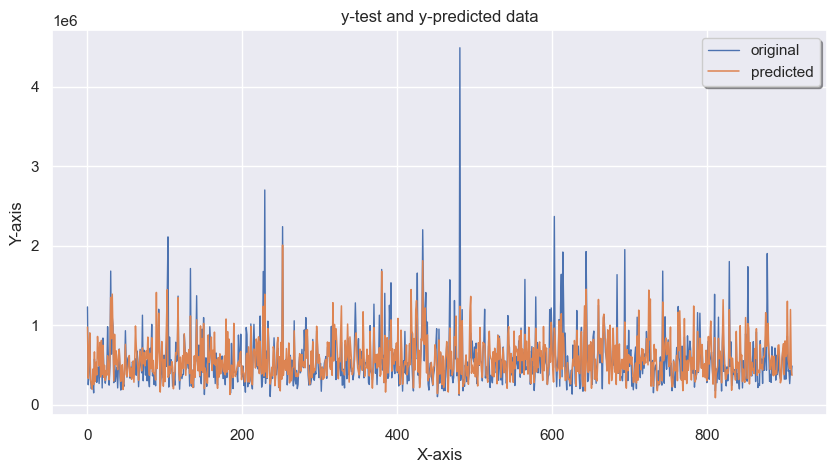

In [78]:
#plot data asli dan hasil prediksi
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_test_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

### 3. Kesimpulan Model Evaluation

- R2 mengukur sejauh mana variasi dalam variabel dependen yang dapat dijelaskan oleh model regresi. Nilai R² berkisar antara 0 hingga 1, dan semakin tinggi nilainya, semakin baik modelnya.

- Pada data train setelah hyperparameter tuning , model dapat memprediksi dengan tingkat keberhasilan 21% persen dimana belum akurat namun saat test sebesar 48%  persen.

- MSE rata-rata dari kuadrat perbedaan antara prediksi model dengan nilai aktual pada test set adalah sekitar 246231.Artinya errornya masih sangat tinggi. Semakin rendah nilai MSE, semakin baik kinerja model Anda dalam memprediksi data pada test set. Dengan kata lain, model cenderung memberikan prediksi yang mendekati nilai aktual pada data test set jika nilai MSE rendah. Sebaliknya, jika nilai MSE tinggi, maka model Anda mungkin memiliki tingkat kesalahan yang besar dalam memprediksi data test set.

- Nilai RMSE sebesar 5.410283e+05	menunjukkan bahwa, secara rata-rata, prediksi model memiliki kesalahan sekitar 541028.3	 unit (misalnya dalam konteks data 'price' adalah mata uang $) terhadap nilai aktual pada data test set.

- Hasil MAE menunjukan angka 156201.2 yang termasuk besar untuk error , arti angka ini adalah Model dapat memprediksi 'Price' dengan range A sampai B, dimana A = 'price'prediction - 156201.2 dan B = 'price'prediction + 156201.2

    Misal : Hasil prediksi harga rumah $800.000, maka range yang dihasilkan adalah $643799 - $956201

- Nilai alpha / parameter regularisasi terbaik untuk SGD Regressor pada model ini adalah 0.0001

- Learning rate / Metode pembelajaran terbaik pada kasus ini adalah Adaptive

- Nilai Max_iter terbaik pada kasus ini adalah 3000

- Model yang digunakan masih sangat under_fit . Namun tetap digunakan karena memiliki nilai yang lebih baik dibandingkan model lainnya.

# **ix. Model Saving**

> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model. Dengan melihat hasil Model Evaluation, pilihlah satu model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan Model Inference dan Model Deployment.

In [79]:
pipe_sgd

Pipeline(steps=[('transormer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('winsorizer '
                                                                   'Gaussian',
                                                                   Winsorizer(tail='both',
                                                                              variables=['bedrooms',
                                                                                         'floors'])),
                                                                  ('winsorizer '
                                                                   'iqr',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both',
                                                                              variables=['sqft_living',
                                                                                         'sqft_above',
                                                                                         'sqft_basement'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'floors',
                                                   'sqft_above',
                                                   'sqft_basement']),
                                                 ('Categorical', 'passthrough',
                                                  ['view', 'condition',
                                                   'area'])])),
                ('regressor', SGDRegressor())])

In [80]:
# Menyimpan model menggunakan pickle
with open('final_pipeline1.pkl', 'wb') as file:
    pickle.dump((pipe_sgd), file)

# **x. Model Inference**

Pada notebook `P1M2_nicholas_halasan_inference`

# **xi. Conclusion**

> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

`BUSSINES:`

- Setelah dicek keterhubungannya dengan Harga rumah di Washington,Amerika Serikat, ternyata ada beberapa faktor yang secara signifikan berpengaruh untuk terhadap harga rumah tersebut. Diantara lain Jumlah kamar tidur, Jumlah Kamar mandi , Luas ruang tamu, Luas bangunan diatas, Luas Basement, Letak geografis kota dengan Kota pusat Seattle, View / pemandangan dari rumah tersebut, Jumlah tingkat rumah , dan Kondisi dari rumah tersebut.

- Tampaknya harus ditambahkan lagi untuk faktor-faktor apa saja yang dapat digunakan, sebagai contoh jarak rumah dengan pusat perbelanjaan , sekolah, rumah sakit dan lain-lain . 

- Rumah Yang menghadap pantai memiliki harga yang lebih tinggi

- Konsumen tidak mementingkan apakah rumah pernah direnovasi atau tidak , yang terpenting kondisi rumah baik.

- Usia rumah yang sudah tua bisa saja memiliki harga lebih tinggi dari rumah baru bila keaslian rumah nya tetap terjaga, biasanya target konsumen nya adalah orang-orang yang menyukai hal hal yang sudah berumur.

`ABOUT MODEL` :

- Dari semua model, digunakan model SGD Regressor yang memiliki r2 score tertinggi dari model lainnya.

- Model rainforest, KNN, SVM, ADAboost regressor, memiliki nilai r2 yang negatif. Menunjukan tidak cocok untuk melakukan regressi terutama pada data ini.

- Permodelan yang dibuat disini belum dapat memprediksi dengan akurat harga dengan berdasarkan faktor - faktor yang sudah disebutkan diatas. Dapat dikatakan akurat nilai r2 nya hanya 0.48

- Hasil permodelan juga dapat dikatakan underfit , belum bisa digunakan untuk keperluan bussiness apalagi berskala besar.

`KESIMPULAN` :

**Kinerja Buruk**: Model memiliki kinerja yang kurang memuaskan dalam menjelaskan variabilitas harga properti.

**Harus Diperbaiki**: Perlu dilakukan evaluasi lebih lanjut terhadap model untuk mengidentifikasi faktor-faktor yang memengaruhi performa buruknya.

**Penyesuaian Model**: Diperlukan penyesuaian pada model, seperti penambahan fitur yang relevan, tuning parameter, atau penggunaan model yang lebih kompleks.


`Langkah-langkah yang Dapat Diambil`:

- Analisis Faktor-Faktor: Identifikasi faktor-faktor yang memiliki dampak signifikan terhadap prediksi harga dan pastikan model memperhitungkannya dengan benar.

- Pengembangan Fitur: Pertimbangkan untuk menambahkan fitur tambahan yang mungkin memberikan informasi lebih lanjut terkait harga properti.

- Tuning Hyperparameter: Lakukan tuning pada hyperparameter model untuk meningkatkan akurasi prediksi.

- Penggunaan Model Lain: Pertimbangkan untuk menggunakan model regresi yang lebih kompleks atau menggabungkan beberapa model (ensemble) untuk meningkatkan kinerja

# **CONCEPTUAL PROBLEM**

## 1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

- Latar belakang : merupakan teknik ensemble learning untuk meningkatkan kinerja model dengan menggabungkan prediksi dari beberapa model yang dibangun secara independen. Pendekatan ini digunakan untuk mengatasi overfitting, meningkatkan stabilitas model, dan mengurangi varians kesalahan prediksi.

- Cara kerja : 

**Bootstrap Sampling**:

Membangun beberapa set data pelatihan baru dengan melakukan bootstrap sampling. Bootstrap sampling melibatkan pengambilan sampel dengan penggantian dari data pelatihan asli. Sehingga setiap set data pelatihan baru dapat memiliki beberapa data yang sama dan beberapa data yang tidak termasuk.

**Model Independen**:

Untuk setiap set data pelatihan yang baru, model dibangun secara independen. Dalam konteks ini, model dapat berupa model yang sama (misalnya, pohon keputusan) atau jenis model yang berbeda.

**Prediksi Individual**:

Setiap model memberikan prediksi pada data pengujian yang belum pernah dilihat sebelumnya.

**Aggregasi Prediksi**:

Prediksi dari semua model diagregasi untuk menghasilkan prediksi akhir. Agregasi dapat dilakukan dengan cara seperti mengambil rata-rata (untuk regresi) atau melakukan voting (untuk klasifikasi).

## 2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

A. Random forest :
Random Forest menggunakan teknik bagging dengan bootstrap sampling. Setiap pohon (model) dibangun pada subset acak dari data pelatihan dengan penggantian.
Keuntungannya adalah  membantu mengurangi overfitting dan variabilitas model dengan memastikan bahwa setiap pohon melihat variasi yang berbeda dari data.

B. AdaBoost Regression :
Pada setiap iterasi, bobot diberikan pada data yang salah klasifikasi oleh model sebelumnya. Oleh karena itu, model berikutnya lebih fokus pada data yang sulit diklasifikasikan. Keuntungannya dapat memberikan perhatian lebih kepada data yang sulit, meningkatkan kinerja model pada kasus yang sulit.

- Perbedaan Utama:

**Cara Membangun Model**:

Random Forest: Membangun model secara paralel dan independen pada subset data.

AdaBoost: Membangun model secara berurutan, dengan memberikan lebih banyak perhatian pada data yang salah klasifikasi.

**Bobot Data**:

Random Forest: Tidak menggunakan bobot pada data, setiap pohon memiliki kontribusi yang sama.

AdaBoost: Memberikan bobot pada data yang salah klasifikasi untuk memfokuskan perhatian model pada kasus sulit.



## 3. Jelaskan apa yang dimaksud dengan Cross Validation !

Cross-validation adalah sebuah teknik yang digunakan dalam machine learning untuk mengevaluasi kinerja model secara objektif. Tujuannya adalah untuk memahami seberapa baik model akan berperforma pada data yang belum pernah dilihat sebelumnya. Dalam cross-validation, data dibagi menjadi beberapa subset (fold) dan model dilatih serta diuji beberapa kali menggunakan kombinasi berbeda dari subset tersebut.

Keuntungan : Menghindari Overfitting, Evaluasi yang Stabil, Pemilihan Model yang Optimal.